In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import shap
%matplotlib inline

### Prepare data and define classification functions

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

def train_rf(merged_df):
    random_state = 2200
    X = merged_df.drop(['crash_likelihood'], axis=1)
    y = merged_df['crash_likelihood']
    # convert y to three levels based on the values
    y = pd.cut(y, bins=[-1, 0.5, 2, 11], labels=['Low', 'Medium', 'High'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

    params = [10, 20, 50, 70, 100, 150, 200]
    criterion = ['entropy', 'log_loss', 'gini']
    accuracy = 0
    for n_est in params:
        for cri in criterion:
            rfc = RandomForestClassifier(n_estimators=n_est, random_state=random_state, criterion=cri)
            scores = cross_val_score(rfc, X_train, y_train, cv=5)
            # rfc.fit(X_train, y_train)
            # print("Average accuracy:", scores.mean())

            # rfc_pred = rfc.predict(X_test)
            # calculate accuracy
            if scores.mean() > accuracy:
                accuracy = scores.mean()
                best_params_est, best_params_cri = n_est, cri

    # rerun the model with the highest accuracy
    rfc = RandomForestClassifier(n_estimators=best_params_est, random_state=random_state, criterion=best_params_cri)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)

    print('n_estimators:', best_params_est)
    print('Criteria:', best_params_cri)
    print(confusion_matrix(y_test, rfc_pred))
    print(classification_report(y_test, rfc_pred, digits=4))

    # explainer = shap.TreeExplainer(rfc)
    # shap_values = explainer.shap_values(X_test)
    # shap.summary_plot(shap_values, X_test, class_names=rfc.classes_)
    # print(rfc.classes_[0])
    # shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 0], X_test)
    # print(rfc.classes_[1])
    # shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 1], X_test)
    # print(rfc.classes_[2])
    # shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 2], X_test)

    # feature_importances = pd.DataFrame(rfc.feature_importances_,
    #                                     index = X.columns,
    #                                     columns=['importance']).sort_values('importance', ascending=False)
    # fig, ax = plt.subplots()
    # feature_importances[:20].plot.bar(ax=ax)
    # ax.set_title("Feature Importances of Random Forest Model")
    # ax.set_ylabel("Mean decrease in impurity")
    # fig.tight_layout()
    # print(feature_importances[:5])
    return y_test, rfc_pred

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

def train_gradient_boosted(merged_df):
    random_state = 2200
    X = merged_df.drop(['crash_likelihood'], axis=1)
    y = merged_df['crash_likelihood']
    # convert y to three levels based on the values
    y = pd.cut(y, bins=[-1, 0.5, 2, 11], labels=['Low', 'Medium', 'High'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

    params = [10, 20, 50, 70, 100, 150, 200]
    criterion = ['squared_error', 'friedman_mse']
    accuracy = 0
    for n_est in params:
        for cri in criterion:
            rfc = GradientBoostingClassifier(n_estimators=n_est, random_state=random_state, criterion=cri)
            rfc.fit(X_train, y_train)

            rfc_pred = rfc.predict(X_test)
            # calculate accuracy
            if np.mean(rfc_pred == y_test) > accuracy:
                accuracy = np.mean(rfc_pred == y_test)
                best_params_est, best_params_cri = n_est, cri

    # rerun the model with the highest accuracy
    rfc = GradientBoostingClassifier(n_estimators=best_params_est, random_state=random_state, criterion=best_params_cri)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)

    print('n_estimators:', n_est)
    print('Criteria:', best_params_cri)
    print(confusion_matrix(y_test, rfc_pred))
    print(classification_report(y_test, rfc_pred))

    feature_importances = pd.DataFrame(rfc.feature_importances_,
                                        index = X.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
    fig, ax = plt.subplots()
    feature_importances[:20].plot.bar(ax=ax)
    ax.set_title("Feature Importances of Random Forest Model")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    print(feature_importances[:5])

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

def train_knn(merged_df):
    random_state = 2200
    X = merged_df.drop(['crash_likelihood'], axis=1)
    y = merged_df['crash_likelihood']
    # convert y to three levels based on the values
    y = pd.cut(y, bins=[-1, 0.5, 2, 11], labels=['Low', 'Medium', 'High'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

    params = [5, 10, 20, 50]
    criterion = ['uniform', 'distance']
    accuracy = 0
    for n_est in params:
        for cri in criterion:
            rfc = KNeighborsClassifier(n_neighbors=n_est, weights=cri)
            rfc.fit(X_train, y_train)

            rfc_pred = rfc.predict(X_test.values)
            # calculate accuracy
            if np.mean(rfc_pred == y_test) > accuracy:
                accuracy = np.mean(rfc_pred == y_test)
                best_params_est, best_params_cri = n_est, cri

    # rerun the model with the highest accuracy
    rfc = KNeighborsClassifier(n_neighbors=best_params_est, weights=best_params_cri)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test.values)

    print('n_estimators:', n_est)
    print('Criteria:', best_params_cri)
    print(confusion_matrix(y_test, rfc_pred))
    print(classification_report(y_test, rfc_pred))

In [21]:
data = pd.read_csv('../../0_data/1_intermediate_ML/selected_features_one_hot_complexity_32_continuous_demanding_all_crash.csv')
data.columns

Index(['road', 'vegetation', 'sky', 'car', 'sidewalk', 'building',
       'lead_car_road', 'lead_car_vegetation', 'lead_car_sky', 'lead_car_car',
       'car_count', 'lead_car_car_count', 'image_id', 'weather_cloudy',
       'weather_foggy', 'weather_rainy', 'weather_snowy',
       'traffic_condition_light', 'traffic_condition_moderate',
       'road_condition_icy', 'road_condition_wet', 'visibility_low visibility',
       'time_of_day_dusk/dawn', 'time_of_day_night',
       'road_layout_slight curve', 'road_layout_straight', 'road_type_highway',
       'road_type_parking', 'road_type_residential area',
       'road_type_rural road', 'road_width_narrow', 'road_width_wide', '0',
       '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', 'demanding_level', 'speed',
       'speed_std', 'speed_mean', 'lon_acceleration_mean',
       'lon_acceleration_std

In [22]:
features = {
    'oneformer': ['road', 'vegetation', 'sky', 'car', 'sidewalk', 'building',
       'lead_car_road', 'lead_car_vegetation', 'lead_car_sky', 'lead_car_car',
       'car_count', 'lead_car_car_count'],
    'semantic': ['weather_cloudy',
       'weather_foggy', 'weather_rainy', 'weather_snowy',
       'traffic_condition_light', 'traffic_condition_moderate',
       'road_condition_icy', 'road_condition_wet', 'visibility_low visibility',
       'time_of_day_dusk/dawn', 'time_of_day_night',
       'road_layout_slight curve', 'road_layout_straight', 'road_type_highway',
       'road_type_parking', 'road_type_residential area',
       'road_type_rural road', 'road_width_narrow', 'road_width_wide'],
    'complexity': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31'],
    'index': ['demanding_level'],
    'driving': ['speed', 'speed_std', 'speed_mean',
       'lon_acceleration_mean', 'lon_acceleration_std', 'lon_acceleration_max',
       'lon_acceleration_min', 'speed_deviation',
       'speed_deviation_normalized']
}

In [23]:
del data['image_id']

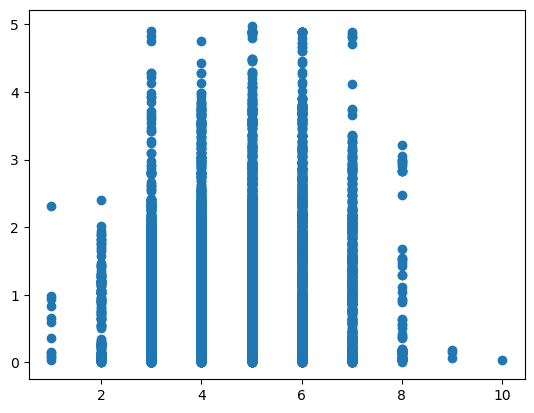

In [55]:
# plot demanding_level and crash likelihood
plt.scatter(data['demanding_level'], data['crash_likelihood'])

### Complexity

In [24]:
train_rf(data[features['complexity'] + ['crash_likelihood']])

n_estimators: 200
Criteria: entropy
[[143  61 120]
 [ 10 952 199]
 [ 25 158 879]]
              precision    recall  f1-score   support

        High     0.8034    0.4414    0.5697       324
         Low     0.8130    0.8200    0.8165      1161
      Medium     0.7337    0.8277    0.7779      1062

    accuracy                         0.7750      2547
   macro avg     0.7834    0.6963    0.7214      2547
weighted avg     0.7787    0.7750    0.7690      2547



(4305       Low
 937     Medium
 8925    Medium
 1893    Medium
 6404       Low
          ...  
 9979       Low
 8522    Medium
 8307       Low
 4181       Low
 8539       Low
 Name: crash_likelihood, Length: 2547, dtype: category
 Categories (3, object): ['Low' < 'Medium' < 'High'],
 array(['Low', 'Medium', 'Medium', ..., 'Medium', 'Low', 'Low'],
       dtype=object))

n_estimators: 200
Criteria: squared_error
[[ 54  83 187]
 [ 15 779 367]
 [ 32 278 752]]
              precision    recall  f1-score   support

        High       0.53      0.17      0.25       324
         Low       0.68      0.67      0.68      1161
      Medium       0.58      0.71      0.64      1062

    accuracy                           0.62      2547
   macro avg       0.60      0.52      0.52      2547
weighted avg       0.62      0.62      0.61      2547

    importance
26    0.118191
11    0.089280
22    0.079642
6     0.066678
0     0.054559


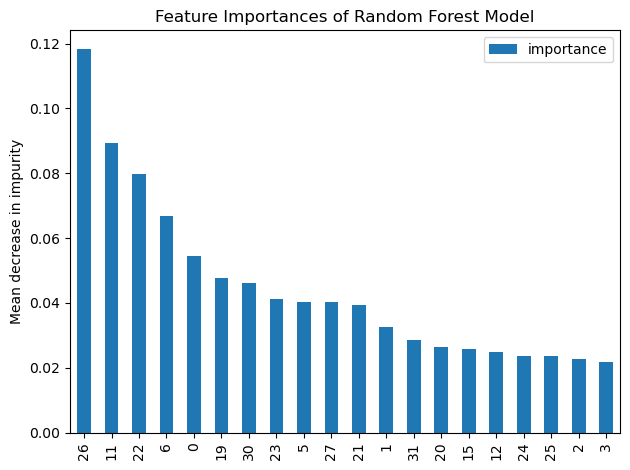

In [57]:
train_gradient_boosted(data[features['complexity'] + ['crash_likelihood']])

In [58]:
train_knn(data[features['complexity'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[134  79 111]
 [ 30 845 286]
 [ 72 260 730]]
              precision    recall  f1-score   support

        High       0.57      0.41      0.48       324
         Low       0.71      0.73      0.72      1161
      Medium       0.65      0.69      0.67      1062

    accuracy                           0.67      2547
   macro avg       0.64      0.61      0.62      2547
weighted avg       0.67      0.67      0.67      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Oneformer + index

In [10]:
train_rf(data[features['oneformer'] + features['index'] + ['crash_likelihood']])

n_estimators: 150
Criteria: gini
[[134  37 153]
 [  3 955 203]
 [ 33 229 800]]
              precision    recall  f1-score   support

        High     0.7882    0.4136    0.5425       324
         Low     0.7821    0.8226    0.8018      1161
      Medium     0.6920    0.7533    0.7214      1062

    accuracy                         0.7417      2547
   macro avg     0.7541    0.6631    0.6886      2547
weighted avg     0.7454    0.7417    0.7353      2547



(4305       Low
 937     Medium
 8925    Medium
 1893    Medium
 6404       Low
          ...  
 9979       Low
 8522    Medium
 8307       Low
 4181       Low
 8539       Low
 Name: crash_likelihood, Length: 2547, dtype: category
 Categories (3, object): ['Low' < 'Medium' < 'High'],
 array(['Low', 'Medium', 'Medium', ..., 'Low', 'Low', 'Low'], dtype=object))

n_estimators: 200
Criteria: squared_error
[[110  46 168]
 [  6 887 268]
 [ 61 265 736]]
              precision    recall  f1-score   support

        High       0.62      0.34      0.44       324
         Low       0.74      0.76      0.75      1161
      Medium       0.63      0.69      0.66      1062

    accuracy                           0.68      2547
   macro avg       0.66      0.60      0.62      2547
weighted avg       0.68      0.68      0.67      2547

                     importance
vegetation             0.421950
lead_car_vegetation    0.136434
lead_car_sky           0.063327
road                   0.056856
sidewalk               0.048654


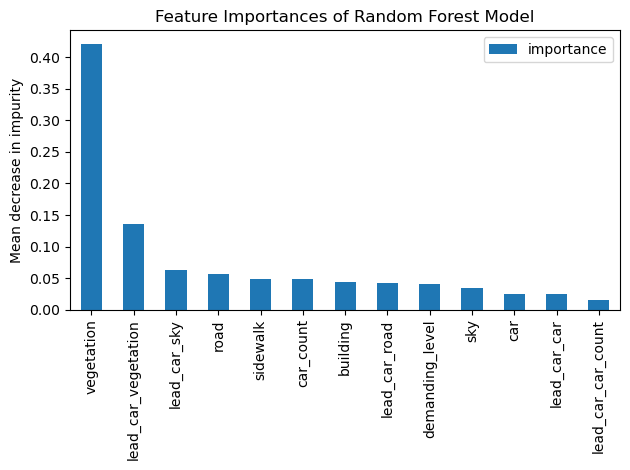

In [9]:
train_gradient_boosted(data[features['oneformer'] + features['index'] + ['crash_likelihood']])

In [10]:
train_knn(data[features['oneformer'] + features['index'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[ 99  65 160]
 [  5 903 253]
 [ 50 310 702]]
              precision    recall  f1-score   support

        High       0.64      0.31      0.41       324
         Low       0.71      0.78      0.74      1161
      Medium       0.63      0.66      0.64      1062

    accuracy                           0.67      2547
   macro avg       0.66      0.58      0.60      2547
weighted avg       0.67      0.67      0.66      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Oneformer + semantic

In [11]:
train_rf(data[features['oneformer'] + features['semantic'] + ['crash_likelihood']])

n_estimators: 200
Criteria: entropy
[[ 168   24  132]
 [   1 1006  154]
 [  23  178  861]]
              precision    recall  f1-score   support

        High     0.8750    0.5185    0.6512       324
         Low     0.8328    0.8665    0.8493      1161
      Medium     0.7507    0.8107    0.7795      1062

    accuracy                         0.7990      2547
   macro avg     0.8195    0.7319    0.7600      2547
weighted avg     0.8039    0.7990    0.7950      2547



(4305       Low
 937     Medium
 8925    Medium
 1893    Medium
 6404       Low
          ...  
 9979       Low
 8522    Medium
 8307       Low
 4181       Low
 8539       Low
 Name: crash_likelihood, Length: 2547, dtype: category
 Categories (3, object): ['Low' < 'Medium' < 'High'],
 array(['Low', 'Medium', 'Medium', ..., 'Medium', 'Low', 'Low'],
       dtype=object))

n_estimators: 200
Criteria: squared_error
[[714  86 153]
 [ 64 721 114]
 [203 155 337]]
              precision    recall  f1-score   support

        High       0.73      0.75      0.74       953
         Low       0.75      0.80      0.77       899
      Medium       0.56      0.48      0.52       695

    accuracy                           0.70      2547
   macro avg       0.68      0.68      0.68      2547
weighted avg       0.69      0.70      0.69      2547

                      importance
lead_car_vegetation     0.310394
vegetation              0.181558
lead_car_sky            0.055316
car_count               0.042385
road_type_rural road    0.039864


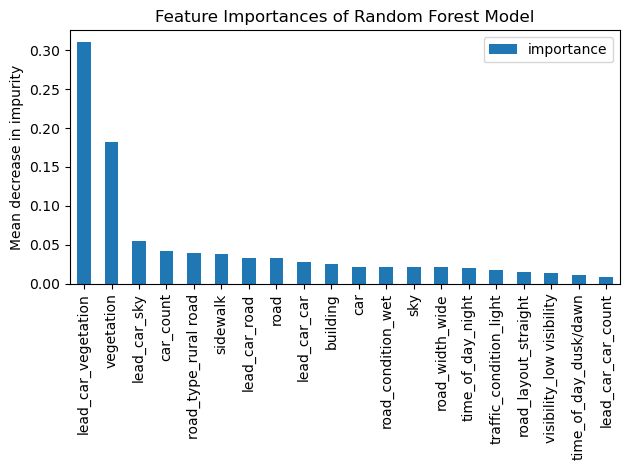

In [12]:
train_gradient_boosted(data[features['oneformer'] + features['semantic'] + ['crash_likelihood']])

In [13]:
train_knn(data[features['oneformer'] + features['semantic'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[711  70 172]
 [ 75 729  95]
 [165 127 403]]
              precision    recall  f1-score   support

        High       0.75      0.75      0.75       953
         Low       0.79      0.81      0.80       899
      Medium       0.60      0.58      0.59       695

    accuracy                           0.72      2547
   macro avg       0.71      0.71      0.71      2547
weighted avg       0.72      0.72      0.72      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Oneformer + semantic + complexity

n_estimators: 200
Criteria: gini
[[845  64  44]
 [ 35 816  48]
 [144  62 489]]
              precision    recall  f1-score   support

        High       0.83      0.89      0.85       953
         Low       0.87      0.91      0.89       899
      Medium       0.84      0.70      0.77       695

    accuracy                           0.84      2547
   macro avg       0.84      0.83      0.84      2547
weighted avg       0.84      0.84      0.84      2547

                     importance
vegetation             0.077884
lead_car_vegetation    0.074324
sky                    0.037045
lead_car_sky           0.035835
lead_car_road          0.025378


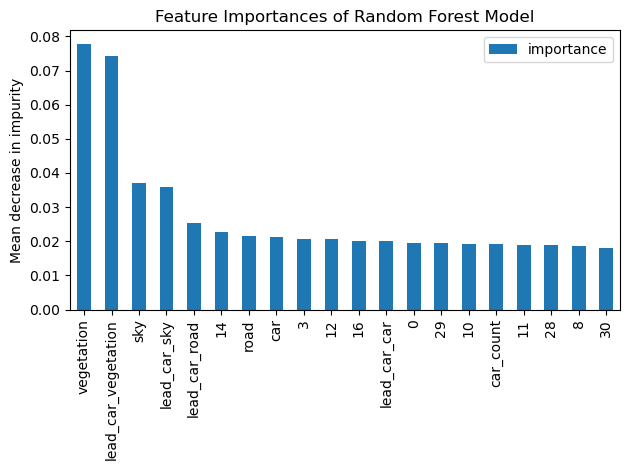

In [14]:
train_rf(data[features['oneformer'] + features['semantic'] + features['complexity'] + ['crash_likelihood']])

n_estimators: 200
Criteria: squared_error
[[756  67 130]
 [ 63 751  85]
 [196 107 392]]
              precision    recall  f1-score   support

        High       0.74      0.79      0.77       953
         Low       0.81      0.84      0.82       899
      Medium       0.65      0.56      0.60       695

    accuracy                           0.75      2547
   macro avg       0.73      0.73      0.73      2547
weighted avg       0.74      0.75      0.74      2547

                      importance
lead_car_vegetation     0.244358
vegetation              0.137284
road_type_rural road    0.034254
lead_car_sky            0.030383
car_count               0.028615


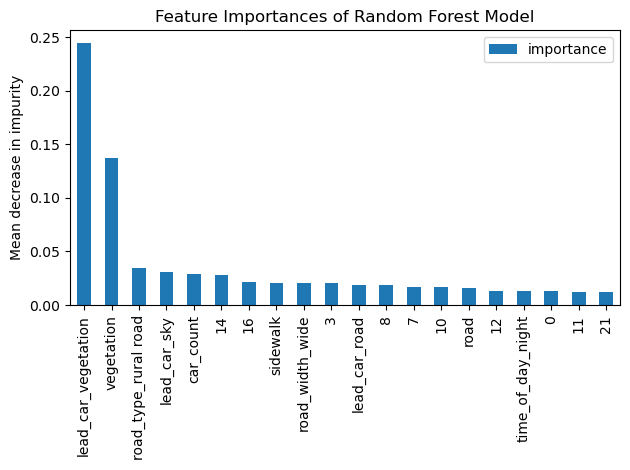

In [15]:
train_gradient_boosted(data[features['oneformer'] + features['semantic'] + features['complexity'] + ['crash_likelihood']])

In [16]:
train_knn(data[features['oneformer'] + features['semantic'] + features['complexity'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[757  64 132]
 [ 61 777  61]
 [118  85 492]]
              precision    recall  f1-score   support

        High       0.81      0.79      0.80       953
         Low       0.84      0.86      0.85       899
      Medium       0.72      0.71      0.71       695

    accuracy                           0.80      2547
   macro avg       0.79      0.79      0.79      2547
weighted avg       0.79      0.80      0.80      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Oneformer + complexity

In [20]:
y_test, y_pred = train_rf(data[features['oneformer'] + features['complexity'] + ['crash_likelihood']])
y_test.to_csv('y_test_complexity_oneformer.csv')
pd.DataFrame(y_pred, columns=['crash_pred']).to_csv('y_pred_complexity_oneformer.csv')

n_estimators: 150
Criteria: entropy
[[138  33 153]
 [  2 984 175]
 [ 23 186 853]]
              precision    recall  f1-score   support

        High     0.8466    0.4259    0.5667       324
         Low     0.8180    0.8475    0.8325      1161
      Medium     0.7223    0.8032    0.7606      1062

    accuracy                         0.7754      2547
   macro avg     0.7956    0.6922    0.7199      2547
weighted avg     0.7817    0.7754    0.7687      2547



n_estimators: 200
Criteria: friedman_mse
[[130  38 156]
 [  4 913 244]
 [ 47 231 784]]
              precision    recall  f1-score   support

        High       0.72      0.40      0.51       324
         Low       0.77      0.79      0.78      1161
      Medium       0.66      0.74      0.70      1062

    accuracy                           0.72      2547
   macro avg       0.72      0.64      0.66      2547
weighted avg       0.72      0.72      0.71      2547

                     importance
vegetation             0.352144
lead_car_vegetation    0.115188
lead_car_sky           0.047476
car_count              0.038503
building               0.034308


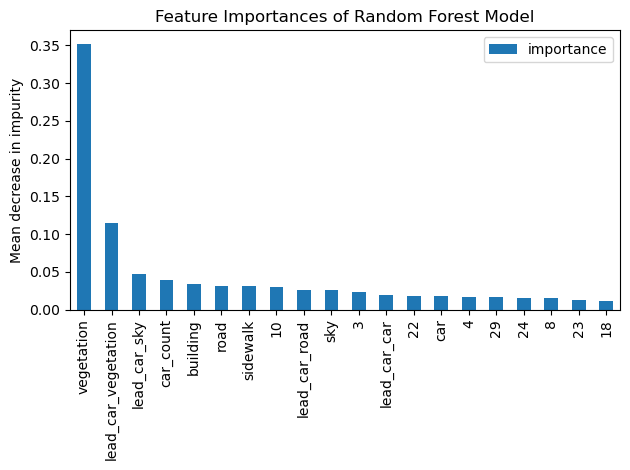

In [47]:
train_gradient_boosted(data[features['oneformer'] + features['complexity'] + ['crash_likelihood']])

In [48]:
train_knn(data[features['oneformer'] + features['complexity'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[127  49 148]
 [ 12 940 209]
 [ 59 268 735]]
              precision    recall  f1-score   support

        High       0.64      0.39      0.49       324
         Low       0.75      0.81      0.78      1161
      Medium       0.67      0.69      0.68      1062

    accuracy                           0.71      2547
   macro avg       0.69      0.63      0.65      2547
weighted avg       0.70      0.71      0.70      2547



### Oneformer + driving + complexity

In [16]:
train_rf(data[features['oneformer'] + features['complexity'] + features['driving'] + ['crash_likelihood']])
y_test.to_csv('y_test_oneformer_driving_complexity_oneformer.csv')
pd.DataFrame(y_pred, columns=['crash_pred']).to_csv('y_pred_oneformer_driving_complexity_oneformer.csv')

n_estimators: 200
Criteria: entropy
[[ 209   23   92]
 [   2 1070   89]
 [  17  131  914]]
              precision    recall  f1-score   support

        High     0.9167    0.6451    0.7572       324
         Low     0.8742    0.9216    0.8973      1161
      Medium     0.8347    0.8606    0.8475      1062

    accuracy                         0.8610      2547
   macro avg     0.8752    0.8091    0.8340      2547
weighted avg     0.8631    0.8610    0.8587      2547



n_estimators: 200
Criteria: squared_error
[[177  30 117]
 [  4 960 197]
 [ 56 185 821]]
              precision    recall  f1-score   support

        High       0.75      0.55      0.63       324
         Low       0.82      0.83      0.82      1161
      Medium       0.72      0.77      0.75      1062

    accuracy                           0.77      2547
   macro avg       0.76      0.72      0.73      2547
weighted avg       0.77      0.77      0.77      2547

                     importance
vegetation             0.277990
lead_car_vegetation    0.113261
speed_deviation        0.061088
speed                  0.053267
speed_mean             0.047947


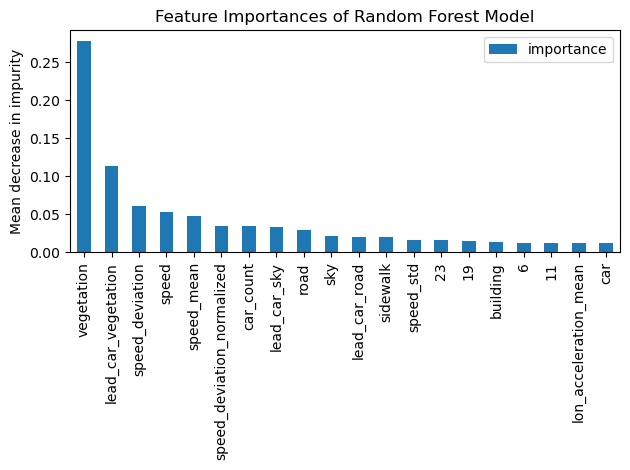

In [60]:
train_gradient_boosted(data[features['oneformer'] + features['complexity'] + features['driving'] + ['crash_likelihood']])

In [61]:
train_knn(data[features['oneformer'] + features['complexity'] + features['driving'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[180  33 111]
 [  9 966 186]
 [ 58 215 789]]
              precision    recall  f1-score   support

        High       0.73      0.56      0.63       324
         Low       0.80      0.83      0.81      1161
      Medium       0.73      0.74      0.73      1062

    accuracy                           0.76      2547
   macro avg       0.75      0.71      0.73      2547
weighted avg       0.76      0.76      0.76      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Oneformer + driving + semantic

In [14]:
y_test, y_pred = train_rf(data[features['semantic'] + features['driving'] + features['oneformer'] + ['crash_likelihood']])
y_test.to_csv('y_test_semantic_driving_oneformer.csv')
pd.DataFrame(y_pred, columns=['crash_pred']).to_csv('y_pred_semantic_driving_oneformer.csv')

n_estimators: 150
Criteria: entropy
[[ 226   18   80]
 [   0 1074   87]
 [  21  111  930]]
              precision    recall  f1-score   support

        High     0.9150    0.6975    0.7916       324
         Low     0.8928    0.9251    0.9086      1161
      Medium     0.8478    0.8757    0.8615      1062

    accuracy                         0.8755      2547
   macro avg     0.8852    0.8328    0.8539      2547
weighted avg     0.8768    0.8755    0.8741      2547



n_estimators: 200
Criteria: squared_error
[[191  23 110]
 [  2 996 163]
 [ 49 163 850]]
              precision    recall  f1-score   support

        High       0.79      0.59      0.67       324
         Low       0.84      0.86      0.85      1161
      Medium       0.76      0.80      0.78      1062

    accuracy                           0.80      2547
   macro avg       0.80      0.75      0.77      2547
weighted avg       0.80      0.80      0.80      2547

                     importance
vegetation             0.273087
lead_car_vegetation    0.114398
speed_mean             0.062415
speed_deviation        0.062207
speed                  0.055702


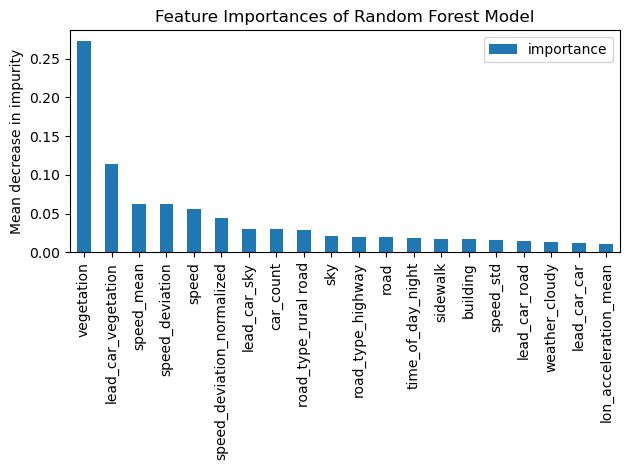

In [33]:
train_gradient_boosted(data[features['index'] + features['semantic'] + features['driving'] + features['oneformer'] + ['crash_likelihood']])

In [34]:
train_knn(data[features['index'] + features['semantic'] + features['driving'] + features['oneformer'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[ 211   22   91]
 [   8 1003  150]
 [  55  154  853]]
              precision    recall  f1-score   support

        High       0.77      0.65      0.71       324
         Low       0.85      0.86      0.86      1161
      Medium       0.78      0.80      0.79      1062

    accuracy                           0.81      2547
   macro avg       0.80      0.77      0.78      2547
weighted avg       0.81      0.81      0.81      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Oneformer + driving + semantic + index

In [15]:
train_rf(data[features['index'] + features['semantic'] + features['driving'] + features['oneformer'] + ['crash_likelihood']])

n_estimators: 200
Criteria: entropy
[[ 220   17   87]
 [   0 1070   91]
 [  20  108  934]]
              precision    recall  f1-score   support

        High     0.9167    0.6790    0.7801       324
         Low     0.8954    0.9216    0.9083      1161
      Medium     0.8399    0.8795    0.8592      1062

    accuracy                         0.8732      2547
   macro avg     0.8840    0.8267    0.8492      2547
weighted avg     0.8750    0.8732    0.8716      2547



(4305       Low
 937     Medium
 8925    Medium
 1893    Medium
 6404       Low
          ...  
 9979       Low
 8522    Medium
 8307       Low
 4181       Low
 8539       Low
 Name: crash_likelihood, Length: 2547, dtype: category
 Categories (3, object): ['Low' < 'Medium' < 'High'],
 array(['Low', 'Medium', 'Medium', ..., 'Medium', 'Low', 'Low'],
       dtype=object))

n_estimators: 200
Criteria: squared_error
[[191  23 110]
 [  2 996 163]
 [ 49 163 850]]
              precision    recall  f1-score   support

        High       0.79      0.59      0.67       324
         Low       0.84      0.86      0.85      1161
      Medium       0.76      0.80      0.78      1062

    accuracy                           0.80      2547
   macro avg       0.80      0.75      0.77      2547
weighted avg       0.80      0.80      0.80      2547

                     importance
vegetation             0.273087
lead_car_vegetation    0.114398
speed_mean             0.062415
speed_deviation        0.062207
speed                  0.055702


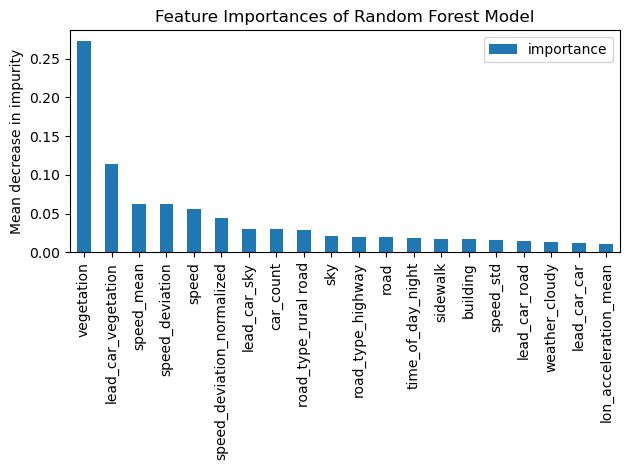

In [17]:
train_gradient_boosted(data[features['index'] + features['semantic'] + features['driving'] + features['oneformer'] + ['crash_likelihood']])

In [18]:
train_knn(data[features['index'] + features['semantic'] + features['driving'] + features['oneformer'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[ 211   22   91]
 [   8 1003  150]
 [  55  154  853]]
              precision    recall  f1-score   support

        High       0.77      0.65      0.71       324
         Low       0.85      0.86      0.86      1161
      Medium       0.78      0.80      0.79      1062

    accuracy                           0.81      2547
   macro avg       0.80      0.77      0.78      2547
weighted avg       0.81      0.81      0.81      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### All features

In [28]:
merged_df = data[features['complexity'] + features['semantic'] + features['driving'] + features['oneformer'] + ['crash_likelihood']]
random_state = 2200
X = merged_df.drop(['crash_likelihood'], axis=1)
y = merged_df['crash_likelihood']
# convert y to three levels based on the values
y = pd.cut(y, bins=[-1, 0.5, 2, 11], labels=['Low', 'Medium', 'High'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

# params = [10, 20, 50, 70, 100, 150, 200]
# criterion = ['entropy', 'log_loss', 'gini']
# accuracy = 0
# for n_est in params:
#     for cri in criterion:
#         rfc = RandomForestClassifier(n_estimators=n_est, random_state=random_state, criterion=cri)
#         rfc.fit(X_train, y_train)

#         rfc_pred = rfc.predict(X_test)
#         # calculate accuracy
#         if np.mean(rfc_pred == y_test) > accuracy:
#             accuracy = np.mean(rfc_pred == y_test)
#             best_params_est, best_params_cri = n_est, cri

best_params_est, best_params_cri = 200, 'entropy'
# rerun the model with the highest accuracy
print('n_estimators:', best_params_est)
print('Criteria:', best_params_cri)
rfc = RandomForestClassifier(n_estimators=best_params_est, random_state=random_state, criterion=best_params_cri)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

# print('n_estimators:', n_est)
# print('Criteria:', best_params_cri)
# print(confusion_matrix(y_test, rfc_pred))
# print(classification_report(y_test, rfc_pred, digits=4))

n_estimators: 200
Criteria: entropy


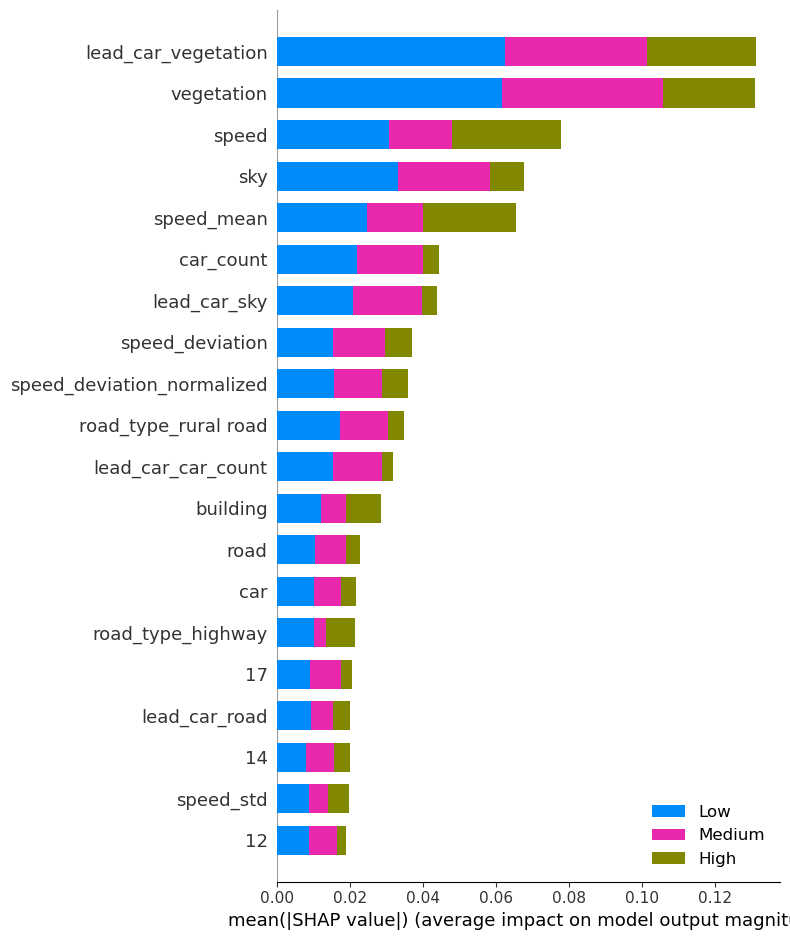

High


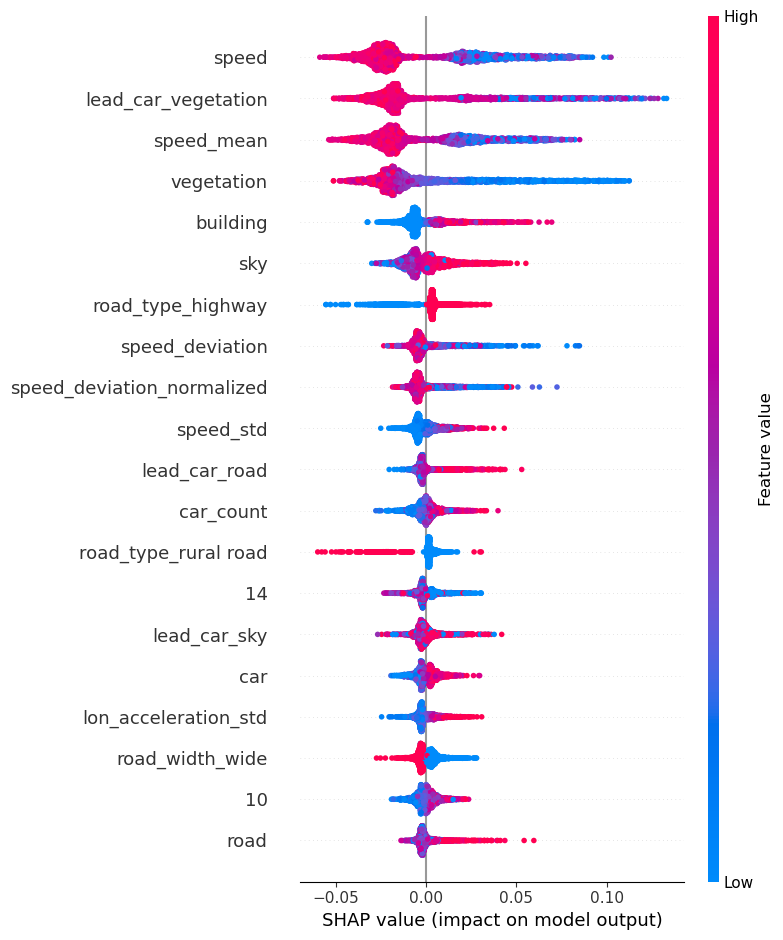

Low


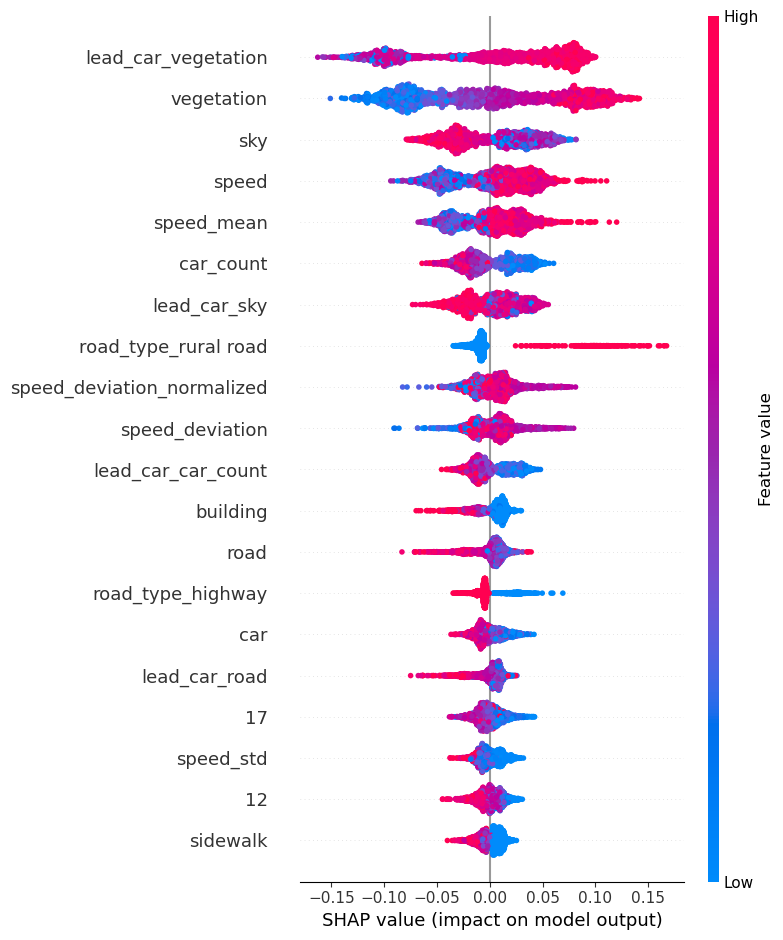

Medium


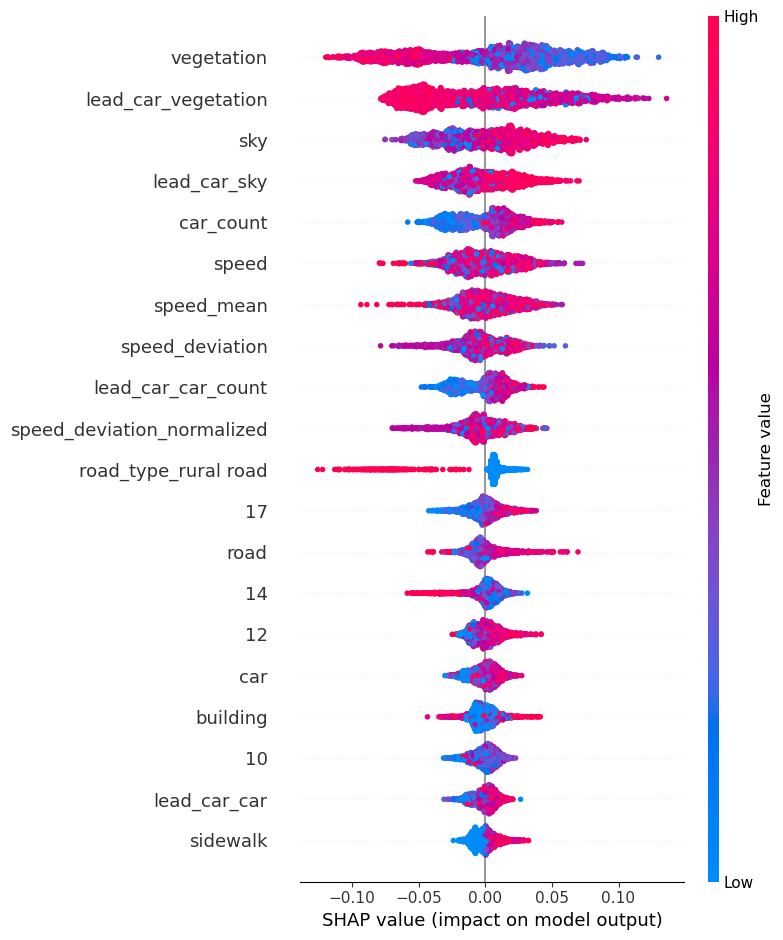

In [29]:
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, class_names=rfc.classes_)
print(rfc.classes_[0])
shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 0], X_test)
print(rfc.classes_[1])
shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 1], X_test)
print(rfc.classes_[2])
shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 2], X_test)

In [27]:
y_test, y_pred = train_rf(data[features['complexity'] + features['semantic'] + features['driving'] + features['oneformer'] + ['crash_likelihood']])

n_estimators: 200
Criteria: entropy
[[ 239   16   69]
 [   1 1093   67]
 [  10   80  972]]
              precision    recall  f1-score   support

        High     0.9560    0.7377    0.8328       324
         Low     0.9193    0.9414    0.9302      1161
      Medium     0.8773    0.9153    0.8959      1062

    accuracy                         0.9046      2547
   macro avg     0.9175    0.8648    0.8863      2547
weighted avg     0.9064    0.9046    0.9035      2547



In [9]:
# y_test, y_pred = train_rf(data[features['complexity'] + features['semantic'] + features['driving'] + features['oneformer'] + ['crash_likelihood']])
# save y_test and y_pred
y_test.to_csv('y_test_complexity_semantic_driving_oneformer.csv')
pd.DataFrame(y_pred, columns=['crash_pred']).to_csv('y_pred_complexity_semantic_driving_oneformer.csv')

n_estimators: 200
Criteria: squared_error
[[ 205   13  106]
 [   0 1013  148]
 [  44  150  868]]
              precision    recall  f1-score   support

        High       0.82      0.63      0.72       324
         Low       0.86      0.87      0.87      1161
      Medium       0.77      0.82      0.79      1062

    accuracy                           0.82      2547
   macro avg       0.82      0.77      0.79      2547
weighted avg       0.82      0.82      0.82      2547

                     importance
vegetation             0.255172
lead_car_vegetation    0.097296
speed_deviation        0.055172
speed                  0.039640
speed_mean             0.039343


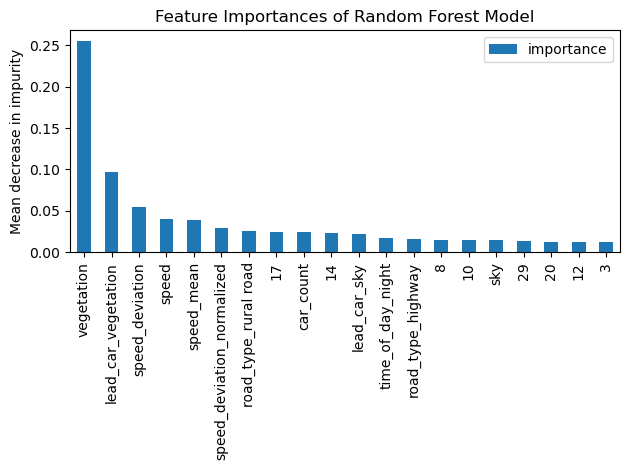

In [20]:
train_gradient_boosted(data[features['complexity'] + features['semantic'] + features['driving'] + features['oneformer'] + ['crash_likelihood']])

In [13]:
train_knn(data[features['complexity'] + features['semantic'] + features['driving'] + features['oneformer'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[791  57 105]
 [ 44 790  65]
 [109  67 519]]
              precision    recall  f1-score   support

        High       0.84      0.83      0.83       953
         Low       0.86      0.88      0.87       899
      Medium       0.75      0.75      0.75       695

    accuracy                           0.82      2547
   macro avg       0.82      0.82      0.82      2547
weighted avg       0.82      0.82      0.82      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Oneformer

n_estimators: 200
Criteria: entropy
[[127  34 163]
 [  4 948 209]
 [ 35 233 794]]
              precision    recall  f1-score   support

        High       0.77      0.39      0.52       324
         Low       0.78      0.82      0.80      1161
      Medium       0.68      0.75      0.71      1062

    accuracy                           0.73      2547
   macro avg       0.74      0.65      0.68      2547
weighted avg       0.74      0.73      0.73      2547

                     importance
vegetation             0.152496
lead_car_vegetation    0.140946
sky                    0.101111
lead_car_sky           0.092007
lead_car_road          0.087174


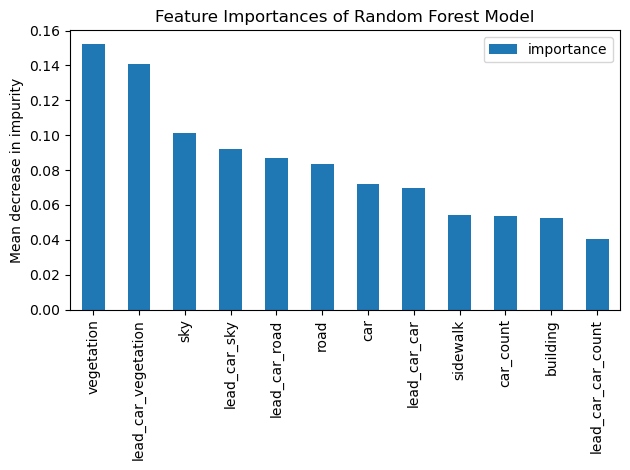

In [45]:
y_test, y_pred = train_rf(data[features['oneformer'] + ['crash_likelihood']])
# y_test.to_csv('y_test_oneformer.csv')
# pd.DataFrame(y_pred, columns=['crash_pred']).to_csv('y_pred_oneformer.csv')

n_estimators: 200
Criteria: squared_error
[[116  48 160]
 [  5 876 280]
 [ 55 274 733]]
              precision    recall  f1-score   support

        High       0.66      0.36      0.46       324
         Low       0.73      0.75      0.74      1161
      Medium       0.62      0.69      0.66      1062

    accuracy                           0.68      2547
   macro avg       0.67      0.60      0.62      2547
weighted avg       0.68      0.68      0.67      2547

                     importance
vegetation             0.413824
lead_car_vegetation    0.140012
lead_car_sky           0.066965
road                   0.059731
sidewalk               0.051131


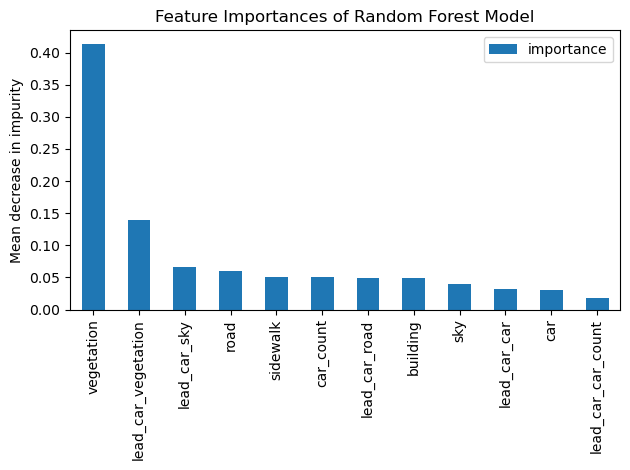

In [36]:
train_gradient_boosted(data[features['oneformer'] + ['crash_likelihood']])

In [37]:
train_knn(data[features['oneformer'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[120  54 150]
 [ 24 899 238]
 [ 75 322 665]]
              precision    recall  f1-score   support

        High       0.55      0.37      0.44       324
         Low       0.71      0.77      0.74      1161
      Medium       0.63      0.63      0.63      1062

    accuracy                           0.66      2547
   macro avg       0.63      0.59      0.60      2547
weighted avg       0.65      0.66      0.65      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Semantic

n_estimators: 200
Criteria: entropy
[[807  95  51]
 [340 520  39]
 [449 128 118]]
              precision    recall  f1-score   support

        High       0.51      0.85      0.63       953
         Low       0.70      0.58      0.63       899
      Medium       0.57      0.17      0.26       695

    accuracy                           0.57      2547
   macro avg       0.59      0.53      0.51      2547
weighted avg       0.59      0.57      0.53      2547

                       importance
road_type_rural road     0.136251
road_width_wide          0.102273
time_of_day_dusk/dawn    0.092518
road_condition_wet       0.089753
road_layout_straight     0.089252


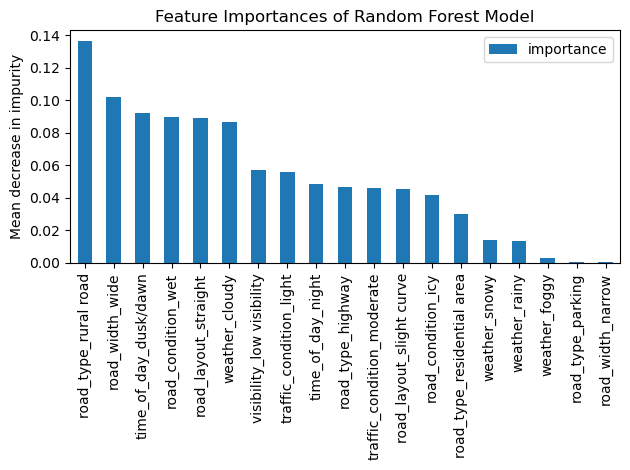

In [30]:
train_rf(data[features['semantic'] + ['crash_likelihood']])

n_estimators: 200
Criteria: squared_error
[[825  92  36]
 [380 491  28]
 [472 129  94]]
              precision    recall  f1-score   support

        High       0.49      0.87      0.63       953
         Low       0.69      0.55      0.61       899
      Medium       0.59      0.14      0.22       695

    accuracy                           0.55      2547
   macro avg       0.59      0.52      0.49      2547
weighted avg       0.59      0.55      0.51      2547

                           importance
road_type_rural road         0.262733
road_width_wide              0.090683
road_condition_wet           0.078237
visibility_low visibility    0.073166
weather_cloudy               0.072199


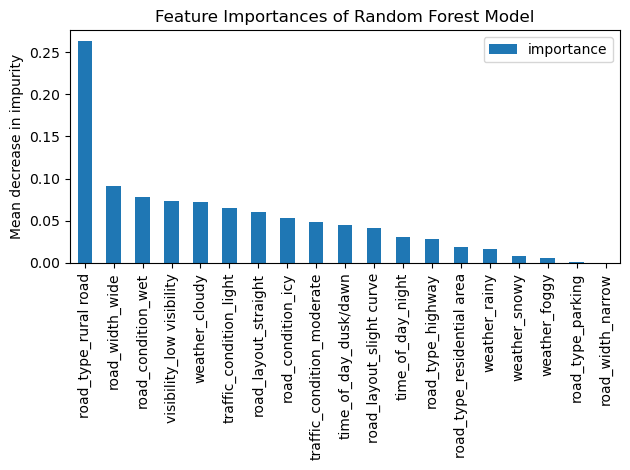

In [31]:
train_gradient_boosted(data[features['semantic'] + ['crash_likelihood']])

In [32]:
train_knn(data[features['semantic'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[663 239  51]
 [236 624  39]
 [334 243 118]]
              precision    recall  f1-score   support

        High       0.54      0.70      0.61       953
         Low       0.56      0.69      0.62       899
      Medium       0.57      0.17      0.26       695

    accuracy                           0.55      2547
   macro avg       0.56      0.52      0.50      2547
weighted avg       0.56      0.55      0.52      2547



### Driving

n_estimators: 200
Criteria: gini
[[679 134 140]
 [141 616 142]
 [214 148 333]]
              precision    recall  f1-score   support

        High       0.66      0.71      0.68       953
         Low       0.69      0.69      0.69       899
      Medium       0.54      0.48      0.51       695

    accuracy                           0.64      2547
   macro avg       0.63      0.63      0.63      2547
weighted avg       0.64      0.64      0.64      2547

                            importance
speed_mean                    0.148928
speed                         0.134165
speed_deviation               0.130733
speed_deviation_normalized    0.130321
speed_std                     0.114721


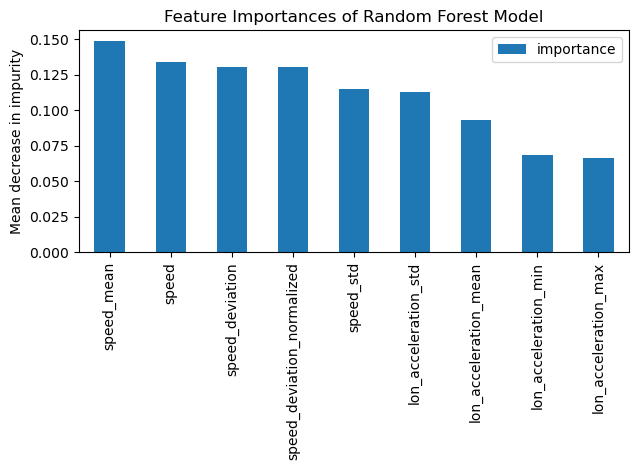

In [33]:
train_rf(data[features['driving'] + ['crash_likelihood']])

n_estimators: 200
Criteria: squared_error
[[621 174 158]
 [182 567 150]
 [219 183 293]]
              precision    recall  f1-score   support

        High       0.61      0.65      0.63       953
         Low       0.61      0.63      0.62       899
      Medium       0.49      0.42      0.45       695

    accuracy                           0.58      2547
   macro avg       0.57      0.57      0.57      2547
weighted avg       0.58      0.58      0.58      2547

                            importance
speed_deviation               0.201549
speed_mean                    0.186401
speed                         0.169355
speed_deviation_normalized    0.165730
lon_acceleration_std          0.087318


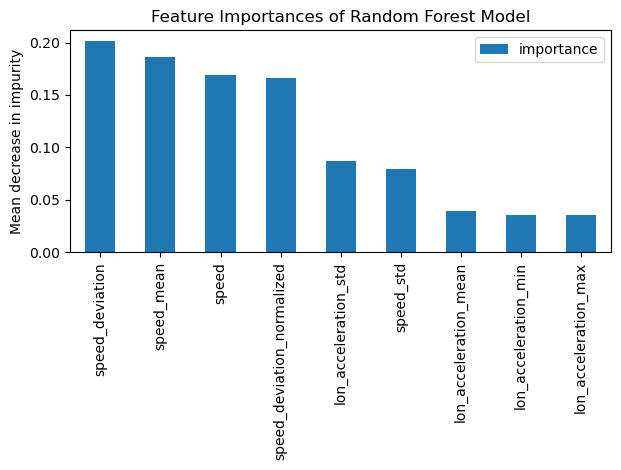

In [34]:
train_gradient_boosted(data[features['driving'] + ['crash_likelihood']])

In [35]:
train_knn(data[features['driving'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[640 170 143]
 [161 580 158]
 [219 170 306]]
              precision    recall  f1-score   support

        High       0.63      0.67      0.65       953
         Low       0.63      0.65      0.64       899
      Medium       0.50      0.44      0.47       695

    accuracy                           0.60      2547
   macro avg       0.59      0.59      0.59      2547
weighted avg       0.59      0.60      0.60      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Oneformer + driving

In [12]:
y_test, y_pred = train_rf(data[features['oneformer'] + features['driving'] + ['crash_likelihood']])
y_test.to_csv('y_test_driving_oneformer.csv')
pd.DataFrame(y_pred, columns=['crash_pred']).to_csv('y_pred_driving_oneformer.csv')

n_estimators: 200
Criteria: entropy
[[ 189   28  107]
 [   2 1050  109]
 [  31  142  889]]
              precision    recall  f1-score   support

        High     0.8514    0.5833    0.6923       324
         Low     0.8607    0.9044    0.8820      1161
      Medium     0.8045    0.8371    0.8205      1062

    accuracy                         0.8355      2547
   macro avg     0.8388    0.7749    0.7983      2547
weighted avg     0.8361    0.8355    0.8322      2547



n_estimators: 200
Criteria: squared_error
[[154  33 137]
 [  4 975 182]
 [ 74 216 772]]
              precision    recall  f1-score   support

        High       0.66      0.48      0.55       324
         Low       0.80      0.84      0.82      1161
      Medium       0.71      0.73      0.72      1062

    accuracy                           0.75      2547
   macro avg       0.72      0.68      0.70      2547
weighted avg       0.74      0.75      0.74      2547

                     importance
vegetation             0.295098
lead_car_vegetation    0.127283
speed_deviation        0.072657
speed_mean             0.063377
speed                  0.062678


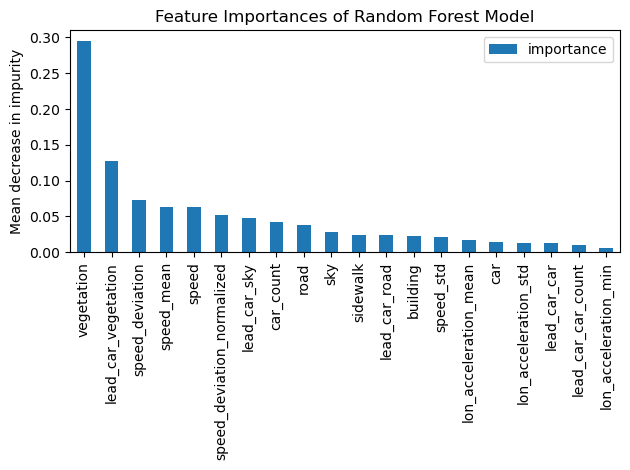

In [39]:
train_gradient_boosted(data[features['oneformer'] + features['driving'] + ['crash_likelihood']])

In [40]:
train_knn(data[features['oneformer'] + features['driving'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[168  40 116]
 [ 16 944 201]
 [ 58 243 761]]
              precision    recall  f1-score   support

        High       0.69      0.52      0.59       324
         Low       0.77      0.81      0.79      1161
      Medium       0.71      0.72      0.71      1062

    accuracy                           0.74      2547
   macro avg       0.72      0.68      0.70      2547
weighted avg       0.73      0.74      0.73      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Oneformer + driving + index

In [13]:
train_rf(data[features['oneformer'] + features['driving'] + features['index'] + ['crash_likelihood']])

n_estimators: 150
Criteria: entropy
[[ 191   26  107]
 [   2 1050  109]
 [  31  138  893]]
              precision    recall  f1-score   support

        High     0.8527    0.5895    0.6971       324
         Low     0.8649    0.9044    0.8842      1161
      Medium     0.8052    0.8409    0.8227      1062

    accuracy                         0.8378      2547
   macro avg     0.8409    0.7783    0.8013      2547
weighted avg     0.8385    0.8378    0.8347      2547



(4305       Low
 937     Medium
 8925    Medium
 1893    Medium
 6404       Low
          ...  
 9979       Low
 8522    Medium
 8307       Low
 4181       Low
 8539       Low
 Name: crash_likelihood, Length: 2547, dtype: category
 Categories (3, object): ['Low' < 'Medium' < 'High'],
 array(['Low', 'Medium', 'Medium', ..., 'Medium', 'Low', 'Low'],
       dtype=object))

n_estimators: 200
Criteria: squared_error
[[160  33 131]
 [  4 974 183]
 [ 65 210 787]]
              precision    recall  f1-score   support

        High       0.70      0.49      0.58       324
         Low       0.80      0.84      0.82      1161
      Medium       0.71      0.74      0.73      1062

    accuracy                           0.75      2547
   macro avg       0.74      0.69      0.71      2547
weighted avg       0.75      0.75      0.75      2547

                     importance
vegetation             0.292753
lead_car_vegetation    0.125497
speed_deviation        0.068793
speed_mean             0.064419
speed                  0.063191


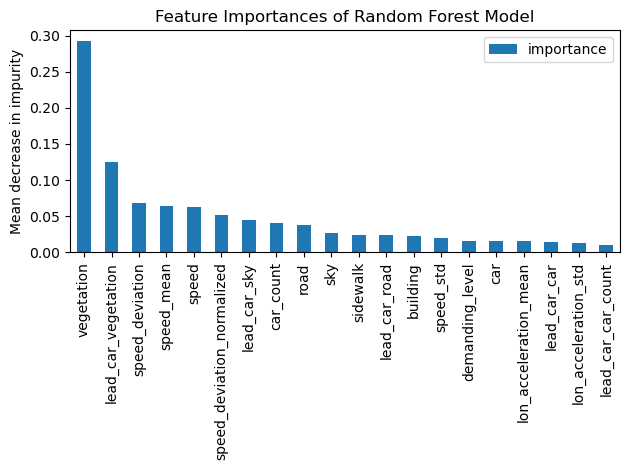

In [14]:
train_gradient_boosted(data[features['oneformer'] + features['driving'] + features['index'] + ['crash_likelihood']])

In [15]:
train_knn(data[features['oneformer'] + features['driving'] + features['index'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[181  41 102]
 [ 18 939 204]
 [ 58 243 761]]
              precision    recall  f1-score   support

        High       0.70      0.56      0.62       324
         Low       0.77      0.81      0.79      1161
      Medium       0.71      0.72      0.71      1062

    accuracy                           0.74      2547
   macro avg       0.73      0.69      0.71      2547
weighted avg       0.74      0.74      0.74      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Semantic + driving

n_estimators: 200
Criteria: gini
[[838  37  78]
 [ 48 762  89]
 [124  60 511]]
              precision    recall  f1-score   support

        High       0.83      0.88      0.85       953
         Low       0.89      0.85      0.87       899
      Medium       0.75      0.74      0.74       695

    accuracy                           0.83      2547
   macro avg       0.82      0.82      0.82      2547
weighted avg       0.83      0.83      0.83      2547

                            importance
speed_mean                    0.119594
speed                         0.119051
speed_deviation_normalized    0.108986
speed_deviation               0.104069
speed_std                     0.075980


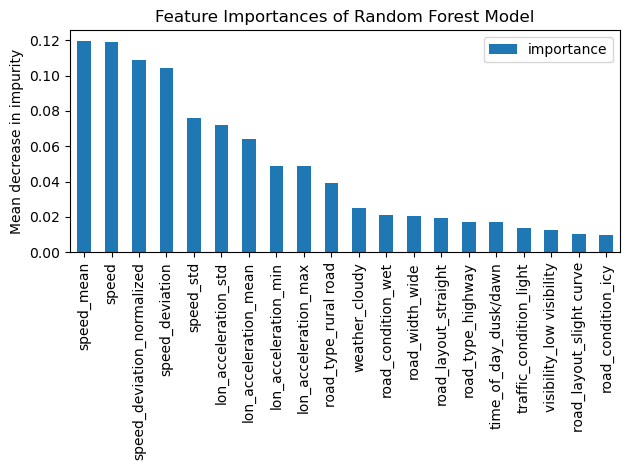

In [39]:
train_rf(data[features['semantic'] + features['driving'] + ['crash_likelihood']])

n_estimators: 200
Criteria: squared_error
[[728  75 150]
 [ 92 673 134]
 [194 108 393]]
              precision    recall  f1-score   support

        High       0.72      0.76      0.74       953
         Low       0.79      0.75      0.77       899
      Medium       0.58      0.57      0.57       695

    accuracy                           0.70      2547
   macro avg       0.69      0.69      0.69      2547
weighted avg       0.70      0.70      0.70      2547

                            importance
speed_mean                    0.165534
speed                         0.143491
speed_deviation               0.126499
road_type_rural road          0.097769
speed_deviation_normalized    0.073460


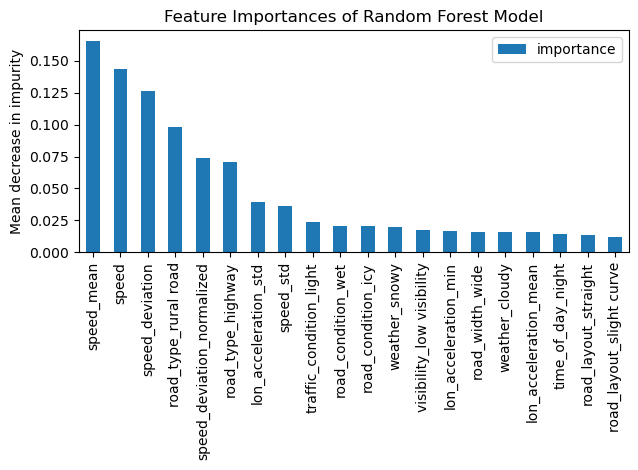

In [40]:
train_gradient_boosted(data[features['semantic'] + features['driving'] + ['crash_likelihood']])

In [41]:
train_knn(data[features['semantic'] + features['driving'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[772  60 121]
 [ 69 733  97]
 [148  74 473]]
              precision    recall  f1-score   support

        High       0.78      0.81      0.80       953
         Low       0.85      0.82      0.83       899
      Medium       0.68      0.68      0.68       695

    accuracy                           0.78      2547
   macro avg       0.77      0.77      0.77      2547
weighted avg       0.78      0.78      0.78      2547



### Archive

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

def train_rf(merged_df):
    random_state = 2200
    X = merged_df.drop(['final_label'], axis=1)
    y = merged_df['final_label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

    params = [10, 20, 50, 70, 100, 150, 200]
    criterion = ['gini', 'entropy', 'log_loss']
    accuracy = 0
    for n_est in params:
        for cri in criterion:
            rfc = RandomForestClassifier(n_estimators=n_est, random_state=random_state, criterion=cri)
            rfc.fit(X_train, y_train)

            rfc_pred = rfc.predict(X_test)
            # calculate accuracy
            if np.mean(rfc_pred == y_test) > accuracy:
                accuracy = np.mean(rfc_pred == y_test)
                best_params_est, best_params_cri = n_est, cri

    # rerun the model with the highest accuracy
    rfc = RandomForestClassifier(n_estimators=best_params_est, random_state=random_state, criterion=best_params_cri)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)

    print('n_estimators:', n_est)
    print('Criteria:', best_params_cri)
    print(confusion_matrix(y_test, rfc_pred))
    print(classification_report(y_test, rfc_pred))

    # explainer = shap.TreeExplainer(rfc)
    # shap_values = explainer.shap_values(X_test)
    # shap.summary_plot(shap_values, X_test, class_names=rfc.classes_)
    # print(rfc.classes_[0])
    # shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 0], X_test)
    # print(rfc.classes_[1])
    # shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 1], X_test)
    # print(rfc.classes_[2])
    # shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 2], X_test)

    feature_importances = pd.DataFrame(rfc.feature_importances_,
                                        index = X.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
    fig, ax = plt.subplots()
    feature_importances[:20].plot.bar(ax=ax)
    ax.set_title("Feature Importances of Random Forest Model")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    print(feature_importances)
    
    X = merged_df[feature_importances.index[:len(feature_importances)//2]]
    y = merged_df['final_label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
    accuracy = 0
    for n_est in params:
        for cri in criterion:
            rfc = RandomForestClassifier(n_estimators=n_est, random_state=random_state, criterion=cri)
            rfc.fit(X_train, y_train)

            rfc_pred = rfc.predict(X_test)
            # calculate accuracy
            if np.mean(rfc_pred == y_test) > accuracy:
                accuracy = np.mean(rfc_pred == y_test)
                best_params_est, best_params_cri = n_est, cri

    # rerun the model with the highest accuracy
    rfc = RandomForestClassifier(n_estimators=best_params_est, random_state=random_state, criterion=best_params_cri)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)

    print('n_estimators:', n_est)
    print('Criteria:', best_params_cri)
    print(confusion_matrix(y_test, rfc_pred))
    print(classification_report(y_test, rfc_pred))

In [3]:
data = pd.read_csv('../../0_data/1_intermediate_ML/selected_features_one_hot_data.csv')
data.columns

Index(['road', 'vegetation', 'sky', 'car', 'sidewalk', 'building',
       'lead_car_road', 'lead_car_vegetation', 'lead_car_sky', 'lead_car_car',
       'car_count', 'lead_car_car_count', 'demanding_level', 'final_label',
       'weather_cloudy', 'weather_partly cloudy', 'weather_rainy',
       'weather_sunny', 'weather_unclear', 'traffic_condition_light',
       'traffic_condition_moderate', 'time_of_day_dusk', 'time_of_day_night',
       'road_type_highway', 'road_type_parking', 'road_type_residential area',
       'road_type_rural road', 'road_width_narrow', 'road_width_wide'],
      dtype='object')

In [4]:
features = {
    'oneformer': ['road', 'vegetation', 'sky', 'car', 'sidewalk', 'building', 'lead_car_road', 'lead_car_vegetation', 
                  'lead_car_sky', 'lead_car_car', 'car_count', 'lead_car_car_count'],
    'semantic': ['weather_cloudy', 'weather_partly cloudy', 'weather_rainy',
                 'weather_sunny', 'weather_unclear', 'traffic_condition_light',
                 'traffic_condition_moderate', 'time_of_day_dusk', 'time_of_day_night',
                 'road_type_highway', 'road_type_parking', 'road_type_residential area',
                 'road_type_rural road', 'road_width_narrow', 'road_width_wide']
}

n_estimators: 200
Criteria: entropy
[[ 5  2  7]
 [ 0 36 12]
 [10 13 40]]
              precision    recall  f1-score   support

        High       0.33      0.36      0.34        14
         Low       0.71      0.75      0.73        48
      Medium       0.68      0.63      0.66        63

    accuracy                           0.65       125
   macro avg       0.57      0.58      0.58       125
weighted avg       0.65      0.65      0.65       125

                            importance
lead_car_car                  0.119940
car                           0.110311
lead_car_vegetation           0.108810
road                          0.084445
lead_car_sky                  0.077811
sky                           0.075888
lead_car_road                 0.074439
vegetation                    0.067393
car_count                     0.047751
lead_car_car_count            0.044739
sidewalk                      0.043414
building                      0.038141
weather_sunny                 0.016674


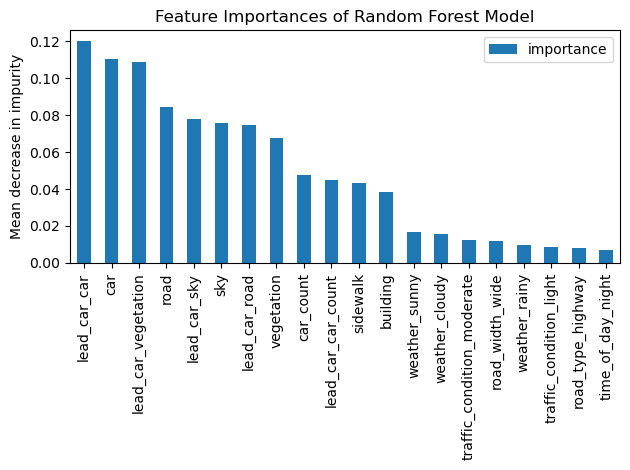

In [5]:
train_rf(data[features['oneformer'] + features['semantic'] + ['final_label']])

n_estimators: 200
Criteria: entropy
[[ 5  3  6]
 [ 0 27 21]
 [ 6 15 42]]
              precision    recall  f1-score   support

        High       0.45      0.36      0.40        14
         Low       0.60      0.56      0.58        48
      Medium       0.61      0.67      0.64        63

    accuracy                           0.59       125
   macro avg       0.55      0.53      0.54       125
weighted avg       0.59      0.59      0.59       125

                     importance
lead_car_car           0.157959
car                    0.120415
lead_car_road          0.117168
lead_car_vegetation    0.092764
road                   0.089887
vegetation             0.087124
sky                    0.077994
lead_car_sky           0.070379
car_count              0.056903
sidewalk               0.046949
lead_car_car_count     0.042681
building               0.039776
n_estimators: 200
Criteria: entropy
[[ 6  1 11]
 [ 0 27 31]
 [ 6 11 57]]
              precision    recall  f1-score   support

  

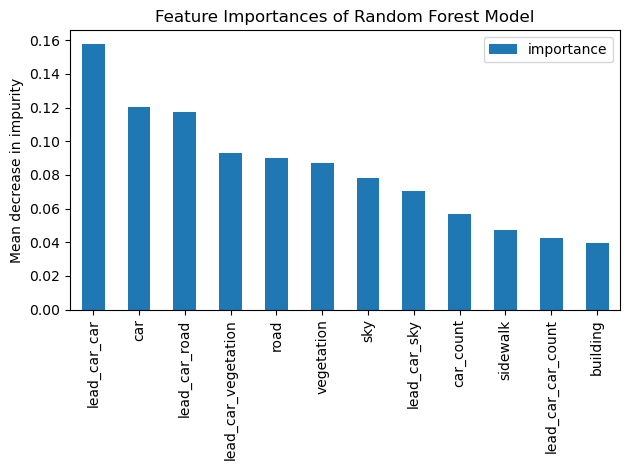

In [6]:
train_rf(data[features['oneformer'] + ['final_label']])

n_estimators: 200
Criteria: gini
[[ 6  0  8]
 [ 1 11 36]
 [ 2  9 52]]
              precision    recall  f1-score   support

        High       0.67      0.43      0.52        14
         Low       0.55      0.23      0.32        48
      Medium       0.54      0.83      0.65        63

    accuracy                           0.55       125
   macro avg       0.59      0.49      0.50       125
weighted avg       0.56      0.55      0.51       125

                            importance
weather_cloudy                0.112439
traffic_condition_light       0.108091
traffic_condition_moderate    0.102704
road_width_wide               0.087163
road_type_highway             0.084443
time_of_day_dusk              0.078289
road_type_rural road          0.077613
weather_sunny                 0.074809
road_type_residential area    0.074567
time_of_day_night             0.069138
weather_unclear               0.041588
weather_partly cloudy         0.032233
weather_rainy                 0.030606
roa

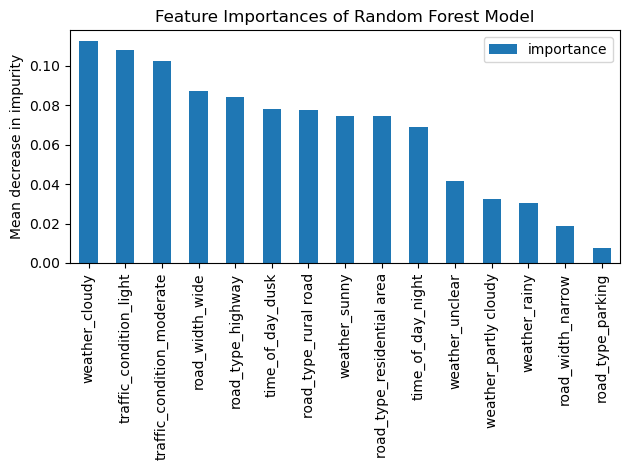

In [7]:
train_rf(data[features['semantic'] + ['final_label']])